In [1]:
import pandas as pd  # Importing pandas library and aliasing it as pd for ease of use
import numpy as np  # Importing numpy library and aliasing it as np for ease of use
import regex  # Importing the regex module
import datetime  # Importing the datetime module
from collections import Counter  # Importing the Counter class from the collections module
import re  # Importing the re module for regular expressions
import matplotlib.pyplot as plt  # Importing the pyplot module from matplotlib and aliasing it as plt for ease of use
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # Importing the WordCloud class, STOPWORDS and ImageColorGenerator modules from the wordcloud library

#Defining functions

This is a Python code that defines three functions: date_time, find_author, and getDatapoint. Here is what each function does:

**date_time(line)**: This function takes a string line as input and tries to convert the first part of the string to a datetime object. It does this by first extracting the date and time from the string using string slicing and the strptime function from the datetime module. If the date and time cannot be extracted or converted to a datetime object, the function returns None. Otherwise, it returns True.

**find_author(s)**: This function takes a string s as input and checks if it contains an author name followed by a colon (i.e., if it is in the format of a message in a chat application). If it does, the function returns True. Otherwise, it returns False.

**getDatapoint(line)**: This function takes a string line as input and uses the split() function to split the string into three parts: the date and time, the author (if there is one), and the message. It then checks if there is an author by calling the find_author() function. If there is an author, it splits the message into the author's name and the message content using string slicing. If there is no author, the author variable is set to None. Finally, the function returns a tuple containing the date, time, author, and message content.

In [2]:
def date_time(line):
    date_time_obj = None
    try:
        date_time_obj = datetime.datetime.strptime(line[:line.index('-')].strip(), '%d/%m/%y, %I:%M %p')
    except ValueError:
        pass
    return date_time_obj is not None

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

#Opening chat and extracting Data

This is a Python code that reads in a WhatsApp chat log file, processes each line of the file, and extracts relevant data points to store in a list called data. Here is what the code does in detail:

**data = []**: This creates an empty list called data, which will be used to store the extracted data points.

**conversation** = '/content/WhatsApp Chat with (Person Name).txt': This creates a string variable conversation that contains the path to the chat log file.

**with open(conversation, encoding="utf-8") as fp:**: This opens the chat log file in read mode and assigns it to a file object called fp. The encoding="utf-8" argument specifies the file encoding to be used.

**fp.readline()**: This reads the first line of the file, which is typically a header that contains information about the chat.

**messageBuffer = []**: This creates an empty list called messageBuffer, which will be used to temporarily store lines of text that make up a single message in the chat.

**date, time, author** = None, None, None: This creates three variables date, time, and author and initializes them to None. These variables will be used to store the date, time, and author information of each message in the chat.

**while True:**: This creates an infinite loop that reads each line of the chat log file one by one.

**line = fp.readline()**: This reads the next line of the file and assigns it to the line variable.

**if not line: break**: This checks if the line variable is empty (i.e., if there are no more lines to read from the file). If so, the loop is broken and the program moves on to the next line of code.

**line = line.strip()**: This removes any leading or trailing whitespace from the line variable.

**if date_time(line):**: This checks if the line variable contains a valid date and time in the format specified in the date_time() function. If so, it moves on to the next block of code. If not, it moves on to the else block.

**if len(messageBuffer) > 0:**: This checks if the messageBuffer list contains any messages (i.e., if it is not empty). If so, it converts the contents of the messageBuffer list into a single string using the join() function and appends a new list containing the date, time, author, and message to the data list.

**messageBuffer.clear()**: This clears the contents of the messageBuffer list in preparation for the next message.

**date, time, author, message = getDatapoint(line)**: This calls the getDatapoint() function with the line variable as input, which returns a tuple containing the date, time, author, and message content of the current line.

**messageBuffer.append(message)**: This appends the message content to the messageBuffer list.

**else:**: This block of code is executed if the line variable does not contain a valid date and time.

**messageBuffer.append(line)**: This appends the line variable to the messageBuffer list. This is typically done for lines that are part of a message but do not contain a date and time stamp (e.g., messages that span multiple lines).

In [3]:
data = []
conversation = '/content/gdsc.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

#Creating DataFrame


In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message']) # Creates Pandas DataFrame with the data list. THe columns parameter specifies the column names to be used in the Data Frame.
df['Date'] = pd.to_datetime(df['Date']) # Converts Date Column to a datetime format
print(df.tail(20)) # Prints last 20 rows of the DataFrame using the tail() function
print(df.info()) # Prints information about the DataFrame
print(df.Author.unique()) # Prints unique values in the author column

          Date      Time                            Author  \
915 2024-01-23  11:29 pm             uzair hasan GDSC UVCE   
916 2024-01-23  11:30 pm        Vinayak❤️‍🔥🪷 Magajikondi🚀🦋   
917 2024-01-23  11:30 pm                              None   
918 2024-01-23  11:31 pm             uzair hasan GDSC UVCE   
919 2024-01-23  11:31 pm  Nihar Dodagatta AimL Uvce Senior   
920 2024-01-23  11:31 pm        Vinayak❤️‍🔥🪷 Magajikondi🚀🦋   
921 2024-01-23  11:31 pm  Nihar Dodagatta AimL Uvce Senior   
922 2024-01-23  11:31 pm             uzair hasan GDSC UVCE   
923 2024-01-23  11:31 pm        Vinayak❤️‍🔥🪷 Magajikondi🚀🦋   
924 2024-01-23  11:32 pm             uzair hasan GDSC UVCE   
925 2024-01-23  11:33 pm  Nihar Dodagatta AimL Uvce Senior   
926 2024-01-23  11:33 pm  Nihar Dodagatta AimL Uvce Senior   
927 2024-01-23  11:33 pm        Vinayak❤️‍🔥🪷 Magajikondi🚀🦋   
928 2024-01-23  11:33 pm     Anagha S Shastri AiMl 27 UVCE   
929 2024-01-23  11:33 pm  Nihar Dodagatta AimL Uvce Senior   
930 2024

In [6]:
print(df.Author.unique()) # Prints unique values in the author column

[None 'Vinayak❤️\u200d🔥\U0001fab7 Magajikondi🚀🦋' 'Shamanth Anna UVCE'
 'Yuktha AiMl UvCE' '+91 73488 34127' 'Nihar Dodagatta AimL Uvce Senior'
 '+91 94555 83897' 'Shivamrut CS Uvce' '+91 81230 76280' '+91 86180 69885'
 '+91 90198 35653' 'Vaish AIMl UVCE 27' 'Anagha S Shastri AiMl 27 UVCE'
 'Renuka Lokhare AiML27' '+91 84319 27108' 'uzair hasan GDSC UVCE'
 '+91 95910 20494' '+91 80732 26247' '+91 91082 23536' 'Bharati GDSC UVCE'
 '+91 6360 675 258' '+91 72041 20818' '+91 78923 83820'
 'Prajwal Arali ISE Hubli 27 uVCE' '+91 6360 985 310' '+91 94495 63552'
 '+91 80505 02782' '+91 83290 28459' '+91 83103 37114' '+91 78924 98948'
 '+91 90195 51905' '+91 98441 70545' '+91 74835 86569'
 'Sindhu CSE UVCE 26' '+91 84311 96173' '+91 78921 73603'
 '+91 78920 77590' 'Nandini A R🔥 AiML 27 UVCE' '+91 99459 57453'
 '+91 72044 38288' '+91 6362 284 824' 'Naveen ❤️AIML 27 UVCE'
 '+91 98398 36947' '+91 97318 64358' '+91 93536 64949']


In [8]:
unique_authors = df['Author'].unique()
num_unique_authors = len(unique_authors)

print("Number of unique authors:", num_unique_authors)

Number of unique authors: 45


#Printing Total Messages

In [10]:
total_messages = df.shape[0]
print(total_messages)

935


#Printing Media Messages

In [11]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

60


#Printing Information

The first line defines a regular expression pattern URLPATTERN to match URLs in strings. This pattern will match any string that starts with "http://" or "https://" and ends with one or more non-whitespace characters.

The second line creates a new column urlcount in the DataFrame df by applying a lambda function to the Message column. The lambda function uses the regex.findall() function to find all instances of URLs in the string and returns the length of the resulting list. This gives the number of URLs in each message.

The third line calculates the total number of links by summing the urlcount column of the DataFrame using the np.sum() function from the NumPy library.

In [12]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Nihar and Honey")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared: ", links)

Chats between Nihar and Honey
Total Messages:  935
Number of Media Shared:  60
Number of Links Shared:  17


In [16]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Anagha S Shastri AiMl 27 UVCE", "Naveen ❤️AIML 27 UVCE"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)

Stats of Anagha S Shastri AiMl 27 UVCE -
Messages Sent 9
Average Words per message 6.888888888888889
Media Messages Sent 3
Links Sent 0
Stats of Naveen ❤️AIML 27 UVCE -
Messages Sent 16
Average Words per message 4.3125
Media Messages Sent 1
Links Sent 0


# Printing Words

The first line of the code joins all the messages in the Message column of the messages_df DataFrame into a single string variable text. It uses a list comprehension to iterate over each message in the column, excluding any message containing the string "Media omitted".

The second line creates a set of stop words using the STOPWORDS variable from the wordcloud library.

The third line generates a WordCloud object with the stopwords parameter set to the stop words set, and the background_color parameter set to "white". The generate() method is called with the text variable as input to generate the word cloud.

The fourth line creates a new figure with a size of 10 inches by 5 inches using the figure() function from the matplotlib.pyplot library.

The fifth line displays the word cloud using the imshow() function from the matplotlib.pyplot library. The interpolation parameter is set to "bilinear" to smooth the edges of the image. The axis() function is called with the parameter "off" to remove the axis lines and labels from the plot.

The last line shows the plot using the show() function from the matplotlib.pyplot library. This displays the word cloud image in a separate window.

There are 44485 words in all the messages.


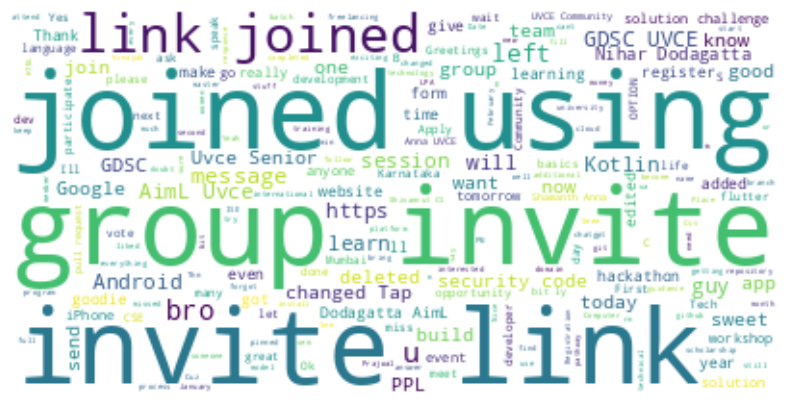

In [15]:
text = " ".join(review for review in messages_df.Message if not re.search(r'Media omitted', review))
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Individual Words

Author name Vinayak❤️‍🔥🪷 Magajikondi🚀🦋


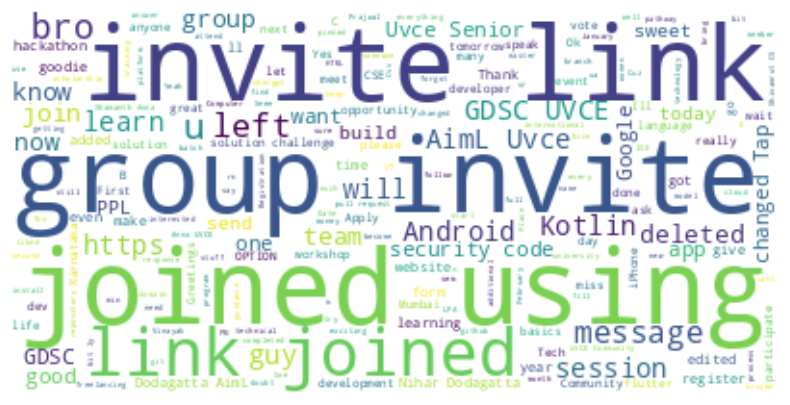

Author name Nihar Dodagatta AimL Uvce Senior


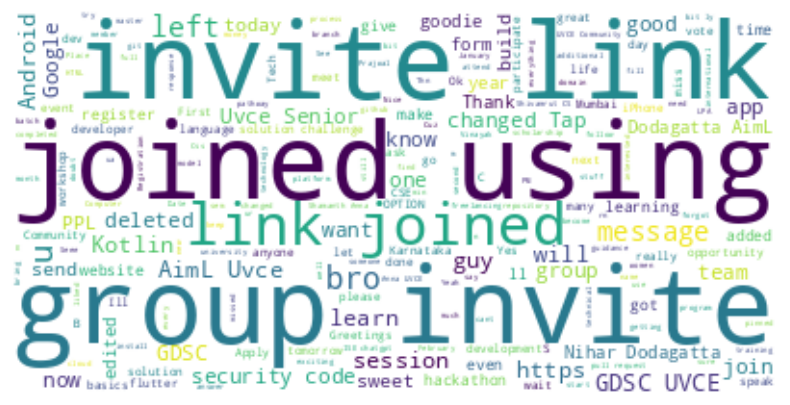

In [17]:
l = ["Vinayak❤️\u200d🔥\U0001fab7 Magajikondi🚀🦋", "Nihar Dodagatta AimL Uvce Senior"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in messages_df.Message if not re.search(r'Media omitted', review))
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()